## Machine Learning for Regression
## Car Features and MSRP
*URL = "https://www.kaggle.com/datasets/CooperUnion/cardataset"*

**Context:**
- This project is about the creation of a model for helping users to predict car prices. The dataset was obtained from Kaggle.

**Content:**
- Cars dataset with features including make, model, year, engine, and other properties of the car used to predict its price or MRSP, the manufacturer's suggested retail price.

**Model:**
- Linear Regression
---
#### **Workflow:**
1. Explore the data
    - Explore the data.
    - Analyze the target distribution.
    - Determine necessary data transformations.
2. Clean up the data.
    - Clean up the data by performing transformations (e.g. removing spaces, converting to lowercase, filling in missing values).
3. Prepare the data.
    - Apply feature engineering by converting categorical features to numerical ones using one-hot encoding.
    - Shuffle and split the data into train, validation, and test sets.
    - Create a feature matrix for each split, including a "virtual bias" column. !!!
4. Train the model.
    - Train the model using the normal equation to calculate weights.
    - Apply regularization to the model.
5. Tune the model
    - Use RMSE to evaluate accuracy.
    - Predict values using the validation dataset and compare with ground truth.
    - Adjust the regularization parameter as necessary.
    - Plot a histogram for easy visual check.
6. Test model with the test dataset.
7. Use model!

In [1]:
import pandas as pd
import numpy as np
from pprint import pprint

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

## Data Preparation

In [34]:
df = pd.read_csv('data.csv')
len(df)

11914

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [36]:
df.head(3)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350


In [37]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
print(df.columns)

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')


In [38]:
df.head(3)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350


In [39]:
for col in df.columns:
    print(f"{col}: ({df[col].nunique()}) {df[col].dtypes} ")
    print(df[col].unique()[:5])
    print()

make: (48) object 
['BMW' 'Audi' 'FIAT' 'Mercedes-Benz' 'Chrysler']

model: (915) object 
['1 Series M' '1 Series' '100' '124 Spider' '190-Class']

year: (28) int64 
[2011 2012 2013 1992 1993]

engine_fuel_type: (10) object 
['premium unleaded (required)' 'regular unleaded'
 'premium unleaded (recommended)' 'flex-fuel (unleaded/E85)' 'diesel']

engine_hp: (356) float64 
[335. 300. 230. 320. 172.]

engine_cylinders: (9) float64 
[ 6.  4.  5.  8. 12.]

transmission_type: (5) object 
['MANUAL' 'AUTOMATIC' 'AUTOMATED_MANUAL' 'DIRECT_DRIVE' 'UNKNOWN']

driven_wheels: (4) object 
['rear wheel drive' 'front wheel drive' 'all wheel drive'
 'four wheel drive']

number_of_doors: (3) float64 
[ 2.  4.  3. nan]

market_category: (71) object 
['Factory Tuner,Luxury,High-Performance' 'Luxury,Performance'
 'Luxury,High-Performance' 'Luxury' 'Performance']

vehicle_size: (3) object 
['Compact' 'Midsize' 'Large']

vehicle_style: (16) object 
['Coupe' 'Convertible' 'Sedan' 'Wagon' '4dr Hatchback']

high

## Exploratory Data Analysis

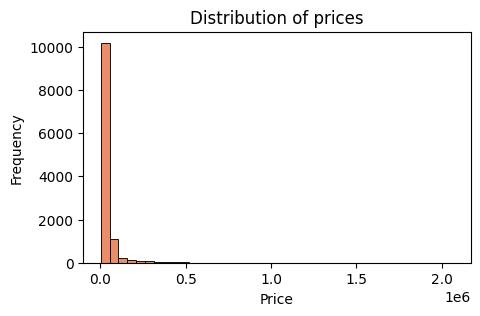

In [40]:
plt.figure(figsize=(5, 3))

sns.set_palette("flare")

sns.histplot(df.msrp, bins=40, alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

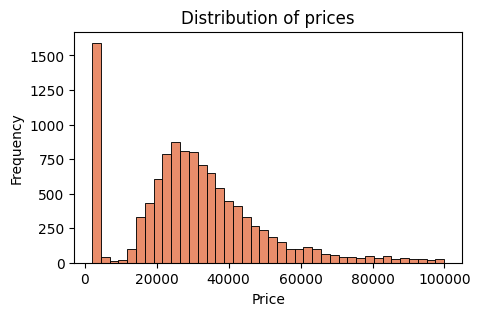

In [41]:
# Zoom in the data
plt.figure(figsize=(5, 3))

sns.set_palette("flare")

sns.histplot(df.msrp[df.msrp < 100000], bins=40, alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

In [42]:
print(np.log([0, 1, 10, 1000, 100000]))

[       -inf  0.          2.30258509  6.90775528 11.51292546]


C:\Users\NutBodyslam\AppData\Local\Temp\ipykernel_8376\875562004.py:1: RuntimeWarning: divide by zero encountered in log
  print(np.log([0, 1, 10, 1000, 100000]))


In [43]:
print(np.log([0+1, 1+1, 10+1, 1000+1, 100000+1]))
print(np.log1p([0, 1, 10, 1000, 100000]))

[ 0.          0.69314718  2.39789527  6.90875478 11.51293546]
[ 0.          0.69314718  2.39789527  6.90875478 11.51293546]


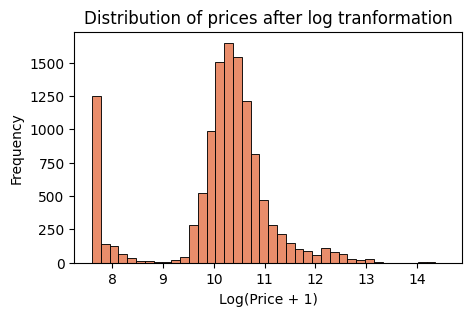

In [44]:
# Handle long tail data distribution applying logarithmic scale.
log_price = np.log1p(df.msrp)

plt.figure(figsize=(5, 3))

sns.set_palette("flare")

sns.histplot(log_price, bins=40, alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Distribution of prices after log tranformation')

plt.show()

In [45]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

## Validation Framework

```
+-----+    +-----+
|     |    |     |
| xxx |--->| xxx |
|     |    |     |
+-----+    +-----+
```

In [46]:
np.random.seed(2)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

print(f"n: {n} => [(n_train: {n_train}), (n_val: {n_val}), (n_test: {n_test})]")
df_shuffled.head()

n: 11914 => [(n_train: 7150), (n_val: 2382), (n_test: 2382)]


,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,Chevrolet,Cobalt,2008,regular unleaded,148.0,4.0,MANUAL,front wheel drive,2.0,NaN,Compact,Coupe,33,24,1385,14410
6720,Toyota,Matrix,2012,regular unleaded,132.0,4.0,AUTOMATIC,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,32,25,2031,19685
5878,Subaru,Impreza,2016,regular unleaded,148.0,4.0,AUTOMATIC,all wheel drive,4.0,Hatchback,Compact,4dr Hatchback,37,28,640,19795
11190,Volkswagen,Vanagon,1991,regular unleaded,90.0,4.0,MANUAL,rear wheel drive,3.0,NaN,Large,Passenger Minivan,18,16,873,2000
4554,Ford,F-150,2017,flex-fuel (unleaded/E85),385.0,8.0,AUTOMATIC,four wheel drive,4.0,Flex Fuel,Large,Crew Cab Pickup,21,15,5657,56260


In [47]:
y_train_orig = df_train.msrp.values
y_val_orig = df_val.msrp.values
y_test_orig = df_test.msrp.values

y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

## Linear Regression
---

*Linear Regression formula:*
$$ y = w_0 + w_1x_1 + w_2x_2 + ... + w_nx_n $$
$$ y = wX $$
Cannot use $X^{-1}$, the input $X$ must be a square metrix:
$$ Xw = y $$
$$ (X^{T}X)w = X^{T}y $$
$$ (X^{T}X)^{-1}(X^{T}X)w = (X^{T}X)^{-1}X^{T}y $$
$$ w = (X^{T}X)^{-1}X^{T}y $$

In [48]:
# Weight
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38, 54, 185],
    [142, 25, 431],
    [453, 31, 86],
]

X = np.array(X)

print(X.T.shape, X.T, X.shape, X, sep='\n\n')

(3, 9)

[[ 148  132  453  158  172  413   38  142  453]
 [  24   25   11   24   25   11   54   25   31]
 [1385 2031   86  185  201   86  185  431   86]]

(9, 3)

[[ 148   24 1385]
 [ 132   25 2031]
 [ 453   11   86]
 [ 158   24  185]
 [ 172   25  201]
 [ 413   11   86]
 [  38   54  185]
 [ 142   25  431]
 [ 453   31   86]]


In [49]:
ones = np.ones(X.shape[0])
X = np.column_stack([ones, X])
print(X.T.shape, X.T, X.shape, X, sep='\n\n')

(4, 9)

[[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00
  1.000e+00 1.000e+00]
 [1.480e+02 1.320e+02 4.530e+02 1.580e+02 1.720e+02 4.130e+02 3.800e+01
  1.420e+02 4.530e+02]
 [2.400e+01 2.500e+01 1.100e+01 2.400e+01 2.500e+01 1.100e+01 5.400e+01
  2.500e+01 3.100e+01]
 [1.385e+03 2.031e+03 8.600e+01 1.850e+02 2.010e+02 8.600e+01 1.850e+02
  4.310e+02 8.600e+01]]

(9, 4)

[[1.000e+00 1.480e+02 2.400e+01 1.385e+03]
 [1.000e+00 1.320e+02 2.500e+01 2.031e+03]
 [1.000e+00 4.530e+02 1.100e+01 8.600e+01]
 [1.000e+00 1.580e+02 2.400e+01 1.850e+02]
 [1.000e+00 1.720e+02 2.500e+01 2.010e+02]
 [1.000e+00 4.130e+02 1.100e+01 8.600e+01]
 [1.000e+00 3.800e+01 5.400e+01 1.850e+02]
 [1.000e+00 1.420e+02 2.500e+01 4.310e+02]
 [1.000e+00 4.530e+02 3.100e+01 8.600e+01]]


In [50]:
y = np.array([100, 200, 150, 250, 100, 200, 150, 250, 120])
print(y.shape, y, sep='\n\n')

(9,)

[100 200 150 250 100 200 150 250 120]


In [51]:
XTX = X.T.dot(X)
print(XTX.shape, XTX, sep='\n\n')

(4, 4)

[[9.000000e+00 2.109000e+03 2.300000e+02 4.676000e+03]
 [2.109000e+03 6.964710e+05 4.411500e+04 7.185400e+05]
 [2.300000e+02 4.411500e+04 7.146000e+03 1.188030e+05]
 [4.676000e+03 7.185400e+05 1.188030e+05 6.359986e+06]]


In [52]:
XTX_inv = np.linalg.inv(XTX)
print(XTX_inv, XTX.dot(XTX_inv).round(), sep='\n\n')

[[ 3.30686958e+00 -5.39612291e-03 -6.21325581e-02 -6.61016816e-04]
 [-5.39612291e-03  1.11633857e-05  8.66973393e-05  1.08664195e-06]
 [-6.21325581e-02  8.66973393e-05  1.46189255e-03  8.57849603e-06]
 [-6.61016816e-04  1.08664195e-06  8.57849603e-06  3.60215866e-07]]

[[ 1. -0.  0.  0.]
 [-0.  1.  0. -0.]
 [-0.  0.  1.  0.]
 [-0. -0.  0.  1.]]


In [53]:
w = XTX_inv.dot(X.T).dot(y)
print(w, w[0], w[1:], sep='\n\n')

[ 3.00067767e+02 -2.27742529e-01 -2.57694130e+00 -2.30120640e-02]

300.06776692555627

[-0.22774253 -2.5769413  -0.02301206]


In [54]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

## Model Training

In [55]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [56]:
# Select only numerical values for prediction.
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

In [57]:
X_train = df_train[base].values
print(X_train.shape, X_train, sep='\n\n')

(7150, 5)

[[ 148.    4.   33.   24. 1385.]
 [ 132.    4.   32.   25. 2031.]
 [ 148.    4.   37.   28.  640.]
 ...
 [ 285.    6.   22.   17.  549.]
 [ 563.   12.   21.   13.   86.]
 [ 200.    4.   31.   22.  873.]]


In [58]:
df_train[base].isnull().sum()

engine_hp           40
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [59]:
df_train[base].fillna(0).isnull().sum()

engine_hp           0
engine_cylinders    0
highway_mpg         0
city_mpg            0
popularity          0
dtype: int64

In [60]:
X_train = df_train[base].fillna(0).values
print(X_train.shape, X_train, sep='\n\n')

(7150, 5)

[[ 148.    4.   33.   24. 1385.]
 [ 132.    4.   32.   25. 2031.]
 [ 148.    4.   37.   28.  640.]
 ...
 [ 285.    6.   22.   17.  549.]
 [ 563.   12.   21.   13.   86.]
 [ 200.    4.   31.   22.  873.]]


In [61]:
w0, w = train_linear_regression(X_train, y_train)
print(w0, w, sep='\n\n')

7.927257388069935

[ 9.70589522e-03 -1.59103494e-01  1.43792133e-02  1.49441072e-02
 -9.06908672e-06]


In [62]:
y_pred = w0 + X_train.dot(w)
print(y_pred)

[ 9.54792783  9.38733977  9.67197758 ... 10.30423015 11.9778914
  9.99863111]


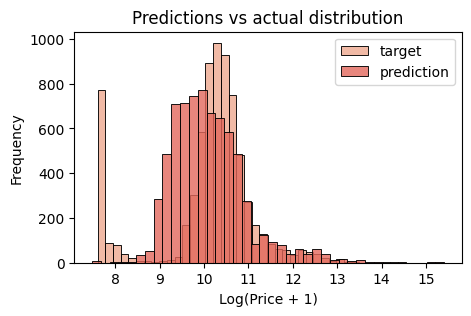

In [63]:
plt.figure(figsize=(5, 3))

sns.set_palette("flare")

sns.histplot(y_train, label='target', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

## Model Validation

$$ RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2} $$

In [64]:
def rmse(y, y_pred):
    error = y_pred - y
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [65]:
rmse(y_train, y_pred)

0.7554192603920132

## Summary

In [66]:
def prepare_X(df, base):
    df_num = df[base]
    X = df_num.fillna(0).values
    return X

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

def rmse(y, y_pred):
    error = y_pred - y
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)

### X_Train validation

In [67]:
# Data Preparation
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
X_train = prepare_X(df_train, base)

# Data Trainning
w_0, w = train_linear_regression(X_train, y_train)

# Data Modeling
y_pred = w_0 + X_train.dot(w)

# Data Validation
rmse(y_train, y_pred)

0.7554192603920132

### X_val validation

In [68]:
# Data Preparation
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
X_train = prepare_X(df_train, base)

# Data Trainning
w_0, w = train_linear_regression(X_train, y_train)

# Data Modeling
X_val = prepare_X(df_val, base)
y_pred = w_0 + X_val.dot(w)

# Data Validation
rmse(y_val, y_pred)

0.7616530991301603

## Feature Engineering

In [69]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [70]:
df.year[:5]

0    2011
1    2011
2    2011
3    2011
4    2011
Name: year, dtype: int64

In [71]:
def prepare_X(df, base):
    df = df.copy()
    features = base.copy()

    # Transform a feature 'year' to 'age'
    df['age'] = 2023 - df.year
    features.append('age')

    df_num = df[features]
    X = df_num.fillna(0).values
    return X

base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

X_train = prepare_X(df_train, base)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print(f"{'train:': <13}{rmse(y_train, y_pred): ^13}")

X_val = prepare_X(df_val, base)
y_pred = w_0 + X_val.dot(w)
print(f"{'validation: ': <13}{rmse(y_val, y_pred): ^13}")

train:       0.5175055465840046
validation:  0.5172055461058339


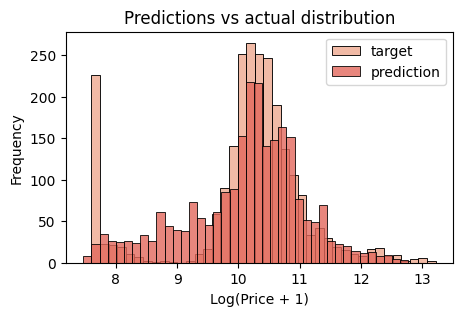

In [72]:
plt.figure(figsize=(5, 3))

sns.set_palette("flare")

sns.histplot(y_val, label='target', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

### Categorical Variables

In [73]:
list(df.number_of_doors.unique())

[2.0, 4.0, 3.0, nan]

In [74]:
print(df.number_of_doors == 2)

0         True
1         True
2         True
3         True
4         True
         ...  
11909    False
11910    False
11911    False
11912    False
11913    False
Name: number_of_doors, Length: 11914, dtype: bool


In [75]:
print((df.number_of_doors == 2).astype(int))

0        1
1        1
2        1
3        1
4        1
        ..
11909    0
11910    0
11911    0
11912    0
11913    0
Name: number_of_doors, Length: 11914, dtype: int32


In [76]:
one_hot = pd.DataFrame()
for v in [2,3,4]:
    one_hot[f'number_of_doors_{v}'] = (df.number_of_doors == v).astype(int)

one_hot

,number_of_doors_2,number_of_doors_3,number_of_doors_4
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
11909,0,0,1
11910,0,0,1
11911,0,0,1
11912,0,0,1


In [77]:
def prepare_X(df, base):
    df = df.copy()
    features = base.copy()

    df['age'] = 2023 - df.year
    features.append('age')

    for v in [2, 3, 4]:
        feature = f"num_doors_{v}"
        df[f"num_doors_{v}"] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    df_num = df[features]
    X = df_num.fillna(0).values
    return X

base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

X_train = prepare_X(df_train, base)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print(f"{'train:': <13}{rmse(y_train, y_pred): ^13}")

X_val = prepare_X(df_val, base)
y_pred = w_0 + X_val.dot(w)
print(f"{'validation: ': <13}{rmse(y_val, y_pred): ^13}")

train:       0.5150615580371418
validation:  0.5157995641502016


In [78]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [79]:
[c for c in df.columns if df[c].dtypes == object]

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [80]:
list(df['make'].unique())

['BMW',
 'Audi',
 'FIAT',
 'Mercedes-Benz',
 'Chrysler',
 'Nissan',
 'Volvo',
 'Mazda',
 'Mitsubishi',
 'Ferrari',
 'Alfa Romeo',
 'Toyota',
 'McLaren',
 'Maybach',
 'Pontiac',
 'Porsche',
 'Saab',
 'GMC',
 'Hyundai',
 'Plymouth',
 'Honda',
 'Oldsmobile',
 'Suzuki',
 'Ford',
 'Cadillac',
 'Kia',
 'Bentley',
 'Chevrolet',
 'Dodge',
 'Lamborghini',
 'Lincoln',
 'Subaru',
 'Volkswagen',
 'Spyker',
 'Buick',
 'Acura',
 'Rolls-Royce',
 'Maserati',
 'Lexus',
 'Aston Martin',
 'Land Rover',
 'Lotus',
 'Infiniti',
 'Scion',
 'Genesis',
 'HUMMER',
 'Tesla',
 'Bugatti']

In [81]:
df['make'].value_counts().head(5)

Chevrolet     1123
Ford           881
Volkswagen     809
Toyota         746
Dodge          626
Name: make, dtype: int64

In [82]:
categorical_variables = [c for c in df.columns if df[c].dtypes == object]

categories = {}
for c in categorical_variables:
    categories[c] = list(df[c].value_counts().head(5).index)

pprint(categories)

{'driven_wheels': ['front wheel drive',
                   'rear wheel drive',
                   'all wheel drive',
                   'four wheel drive'],
 'engine_fuel_type': ['regular unleaded',
                      'premium unleaded (required)',
                      'premium unleaded (recommended)',
                      'flex-fuel (unleaded/E85)',
                      'diesel'],
 'make': ['Chevrolet', 'Ford', 'Volkswagen', 'Toyota', 'Dodge'],
 'market_category': ['Crossover',
                     'Flex Fuel',
                     'Luxury',
                     'Luxury,Performance',
                     'Hatchback'],
 'model': ['Silverado 1500',
           'Tundra',
           'F-150',
           'Sierra 1500',
           'Beetle Convertible'],
 'transmission_type': ['AUTOMATIC',
                       'MANUAL',
                       'AUTOMATED_MANUAL',
                       'DIRECT_DRIVE',
                       'UNKNOWN'],
 'vehicle_size': ['Compact', 'Midsize', 'Large'],
 

In [83]:
def prepare_X(df, base):
    df = df.copy()
    features = base.copy()

    df['age'] = 2023 - df.year
    features.append('age')

    for v in [2, 3, 4]:
        feature = f"num_doors_{v}"
        df[f"num_doors_{v}"] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for c, values in categories.items():
        for v in values:
            feature = f"{c}_{v}"
            df[feature] = (df[c] == v).astype(int)
            features.append(feature)

    df_num = df[features]
    X = df_num.fillna(0).values
    return X

base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

X_train = prepare_X(df_train, base)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print(f"{'train:': <13}{rmse(y_train, y_pred): ^13}")

X_val = prepare_X(df_val, base)
y_pred = w_0 + X_val.dot(w)
print(f"{'validation: ': <13}{rmse(y_val, y_pred): ^13}")

train:       67.95751671259303
validation:  61.60349448126468


In [84]:
w_0

1.184234450543966e+16

In [85]:
int(w_0)

11842344505439660

In [86]:
w

array([ 1.58816985e-01, -4.55671371e-01,  2.89453702e-01,  2.95342053e+00,
       -4.85886297e-04,  1.46693734e+00,  1.09657479e+03,  1.10807557e+03,
        1.09115908e+03,  1.80379311e+00,  7.76611869e+00,  5.57110166e+00,
       -1.30277466e+00,  7.26735251e-02,  4.62347747e+00,  1.16668686e+01,
       -3.07990186e+00, -1.52155995e+00, -1.32062662e+01,  2.85266462e+01,
        2.55843326e+01,  3.04782280e+01,  7.97436629e+00,  9.73896294e+01,
       -1.11987724e+16, -1.11987724e+16, -1.11987724e+16, -1.11987724e+16,
       -1.11987724e+16, -6.43572070e+14, -6.43572070e+14, -6.43572070e+14,
       -6.43572070e+14,  2.34558214e+00,  1.70270934e+00,  6.21981787e+00,
       -2.96280556e+00, -2.46854366e+00,  1.43714120e+01,  1.00486075e+01,
        3.26730511e+01, -8.44316325e-02,  6.13911333e-03,  1.76928471e-01,
        3.74550688e-01, -1.96367745e-01])

## Regularization

In [87]:
df['make'].value_counts().head(5)

Chevrolet     1123
Ford           881
Volkswagen     809
Toyota         746
Dodge          626
Name: make, dtype: int64

In [88]:
list(df['make'].value_counts().head(5).index)

['Chevrolet', 'Ford', 'Volkswagen', 'Toyota', 'Dodge']

In [89]:
def prepare_X(df, base):
    df = df.copy()
    features = base.copy()

    df['age'] = 2023 - df.year
    features.append('age')

    for v in [2, 3, 4]:
        feature = f"num_doors_{v}"
        df[f"num_doors_{v}"] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = f"is_make_{v}"
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)

    df_num = df[features]
    X = df_num.fillna(0).values
    return X

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

X_train = prepare_X(df_train, base)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print(f"{'train:': <13}{rmse(y_train, y_pred): ^13}")

X_val = prepare_X(df_val, base)
y_pred = w_0 + X_val.dot(w)
print(f"{'validation: ': <13}{rmse(y_val, y_pred): ^13}")

LinAlgError: Singular matrix

$$
A = \begin{bmatrix}
a & b \\
c & d
\end{bmatrix}
\quad \implies \quad
A^{-1} = \frac{1}{ad-bc} \begin{bmatrix}
d & -b \\
-c & a
\end{bmatrix};
\quad if \quad
|A| = ad - bc  \quad\neq\quad 0
$$

In [ ]:
A = np.array(
    [[1,0,0],
     [2,0,0],
     [3,1,1]]
)

B = np.eye(3) * 0.01

C = A+B

C
# np.linalg.inv(C)

array([[1.01, 0.  , 0.  ],
       [2.  , 0.01, 0.  ],
       [3.  , 1.  , 1.01]])

In [90]:
def prepare_X(df, base):
    df = df.copy()
    features = base.copy()

    df['age'] = 2023 - df.year
    features.append('age')

    for v in [2, 3, 4]:
        feature = f"num_doors_{v}"
        df[f"num_doors_{v}"] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = f"is_make_{v}"
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)

    df_num = df[features]
    X = df_num.fillna(0).values
    return X
#-------------------------------------------------------------------------------
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0]) # Regularization!!!

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]
#-------------------------------------------------------------------------------
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

X_train = prepare_X(df_train, base)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.001) # r = regulatorization parameter!!!

y_pred = w_0 + X_train.dot(w)
print(f"{'train:': <13}{rmse(y_train, y_pred): ^13}")

X_val = prepare_X(df_val, base)
y_pred = w_0 + X_val.dot(w)
print(f"{'validation: ': <13}{rmse(y_val, y_pred): ^13}")

train:       0.5150615640444546
validation:  0.5158002942778432


## Model Tuning

In [160]:
for r in [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]:
    X_train = prepare_X(df_train, base)
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val, base)
    y_pred = w_0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    print(f"r: {r: <6} => w_0: {w_0:>8.4}, W_3: {w[2]:>10.4}, W_5: {w[4]:>10.4}, score: {score:>8.4}")

r: 1e-05  => w_0:    11.23, W_3:  -0.003942, W_5: -4.551e-05, score:   0.5158
r: 0.0001 => w_0:    11.23, W_3:  -0.003942, W_5: -4.551e-05, score:   0.5158
r: 0.001  => w_0:    11.22, W_3:   -0.00394, W_5: -4.551e-05, score:   0.5158
r: 0.01   => w_0:     11.2, W_3:  -0.003917, W_5: -4.549e-05, score:   0.5158
r: 0.1    => w_0:    10.95, W_3:  -0.003697, W_5: -4.539e-05, score:   0.5159
r: 1      => w_0:    9.492, W_3:  -0.002103, W_5: -4.438e-05, score:   0.5166
r: 10     => w_0:    7.234, W_3:   0.006066, W_5: -3.526e-05, score:   0.5261
r: 100    => w_0:    4.359, W_3:    0.04909, W_5:  1.739e-05, score:   0.7046
r: 1000   => w_0:    0.984, W_3:     0.1121, W_5:  8.578e-05, score:    1.123
r: 10000  => w_0:   0.1306, W_3:     0.1305, W_5:  0.0001266, score:    1.317


## Model Using

In [28]:
df['engine_fuel_type'].value_counts()

regular_unleaded                                7172
premium_unleaded_(required)                     2009
premium_unleaded_(recommended)                  1523
flex-fuel_(unleaded/e85)                         899
diesel                                           154
electric                                          66
flex-fuel_(premium_unleaded_required/e85)         54
flex-fuel_(premium_unleaded_recommended/e85)      26
flex-fuel_(unleaded/natural_gas)                   6
natural_gas                                        2
Name: engine_fuel_type, dtype: int64

In [29]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)

    for v in ['regular_unleaded', 'premium_unleaded_(required)', 
              'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)']:
        feature = 'is_type_%s' % v
        df[feature] = (df['engine_fuel_type'] == v).astype(int)
        features.append(feature)
        
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [30]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

train: 0.4788482615078598
validation: 0.4748256737227088


In [31]:
df['transmission_type'].value_counts()

automatic           8266
manual              2935
automated_manual     626
direct_drive          68
unknown               19
Name: transmission_type, dtype: int64

In [32]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)

    for v in ['regular_unleaded', 'premium_unleaded_(required)', 
              'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)']:
        feature = 'is_type_%s' % v
        df[feature] = (df['engine_fuel_type'] == v).astype(int)
        features.append(feature)

    for v in ['automatic', 'manual', 'automated_manual']:
        feature = 'is_transmission_%s' % v
        df[feature] = (df['transmission_type'] == v).astype(int)
        features.append(feature)
        
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [33]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

train: 0.4745380510924004
validation: 0.4685879194659198


In [34]:
df['driven_wheels'].value_counts()

front_wheel_drive    4787
rear_wheel_drive     3371
all_wheel_drive      2353
four_wheel_drive     1403
Name: driven_wheels, dtype: int64

In [35]:
df['market_category'].value_counts().head(5)

crossover             1110
flex_fuel              872
luxury                 855
luxury,performance     673
hatchback              641
Name: market_category, dtype: int64

In [36]:
df['vehicle_size'].value_counts().head(5)

compact    4764
midsize    4373
large      2777
Name: vehicle_size, dtype: int64

In [37]:
df['vehicle_style'].value_counts().head(5)

sedan            3048
4dr_suv          2488
coupe            1211
convertible       793
4dr_hatchback     702
Name: vehicle_style, dtype: int64

In [38]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)

    for v in ['regular_unleaded', 'premium_unleaded_(required)', 
              'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)']:
        feature = 'is_type_%s' % v
        df[feature] = (df['engine_fuel_type'] == v).astype(int)
        features.append(feature)

    for v in ['automatic', 'manual', 'automated_manual']:
        feature = 'is_transmission_%s' % v
        df[feature] = (df['transmission_type'] == v).astype(int)
        features.append(feature)

    for v in ['front_wheel_drive', 'rear_wheel_drive', 'all_wheel_drive', 'four_wheel_drive']:
        feature = 'is_driven_wheens_%s' % v
        df[feature] = (df['driven_wheels'] == v).astype(int)
        features.append(feature)

    for v in ['crossover', 'flex_fuel', 'luxury', 'luxury,performance', 'hatchback']:
        feature = 'is_mc_%s' % v
        df[feature] = (df['market_category'] == v).astype(int)
        features.append(feature)

    for v in ['compact', 'midsize', 'large']:
        feature = 'is_size_%s' % v
        df[feature] = (df['vehicle_size'] == v).astype(int)
        features.append(feature)

    for v in ['sedan', '4dr_suv', 'coupe', 'convertible', '4dr_hatchback']:
        feature = 'is_style_%s' % v
        df[feature] = (df['vehicle_style'] == v).astype(int)
        features.append(feature)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [39]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

train: 1607.4898641126447
validation: 830.8920785817741


In [40]:
w_0

-6.947006956027172e+17

## Regularization

In [41]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [42]:
X_train = prepare_X(df_train)

In [43]:
for r in [0, 0.001, 0.01, 0.1, 1, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    print('%5s, %.2f, %.2f, %.2f' % (r, w_0, w[13], w[21]))

    0, -694700695602717184.00, 278.96, 694700695602667008.00
0.001, 7.19, -0.10, 1.81
 0.01, 7.18, -0.10, 1.81
  0.1, 7.05, -0.10, 1.78
    1, 6.22, -0.10, 1.56
   10, 4.39, -0.09, 1.08


In [44]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('val', rmse(y_val, y_pred))

train 1607.4898641126447
val 830.8920785817741


In [45]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('val', rmse(y_val, y_pred))

train 0.46431248945738135
val 0.46023949632611183


In [46]:
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)

for r in [0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, rmse(y_val, y_pred))

 1e-06 0.4602255729429437
0.0001 0.4602254945347706
 0.001 0.46022676266043516
  0.01 0.46023949632611183
   0.1 0.46037006958137333
     1 0.46182980426538955
     5 0.46840796275338076
    10 0.4757248100693528


In [47]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

X_test = prepare_X(df_test)
y_pred = w_0 + X_test.dot(w)
print('test:', rmse(y_test, y_pred))

validation: 0.46023949632611183
test: 0.4571813679692604


## Using the model

In [48]:
i = 2
ad = df_test.iloc[i].to_dict()
ad

{'make': 'toyota',
 'model': 'venza',
 'year': 2013,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 268.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'all_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': 'crossover,performance',
 'vehicle_size': 'midsize',
 'vehicle_style': 'wagon',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

In [49]:
X_test = prepare_X(pd.DataFrame([ad]))[0]
y_pred = w_0 + X_test.dot(w)
suggestion = np.expm1(y_pred)
suggestion

28294.135912260714

## Summary
- Data Preparation
- EDA
- Linear Regression
- Model Training
- Model Validation
- Feature Enginnering
- Regularization
- Model Tuning
- Model Using